<a href="https://colab.research.google.com/github/dami163/Assignment/blob/main/Q_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(-0.5, 779.5, 437.5, -0.5)

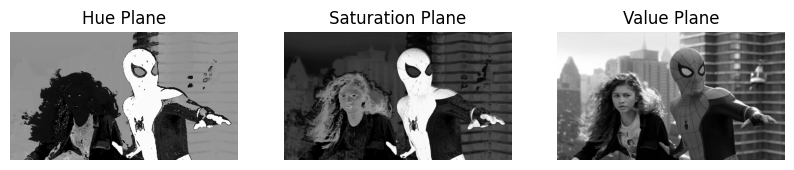

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("spider.png",cv.IMREAD_COLOR)
im = cv.cvtColor(image, cv.COLOR_BGR2HSV)
imc = cv.cvtColor(image, cv.COLOR_BGR2RGB)

h_img,s_img,v_img = cv.split(im)

fig, ax = plt.subplots(1, 3, figsize=(10,5))

ax[0].imshow(h_img, cmap='gray')
ax[0].set_title('Hue Plane')
ax[0].axis('off')

ax[1].imshow(s_img, cmap='gray')
ax[1].set_title('Saturation Plane')
ax[1].axis('off')

ax[2].imshow(v_img, cmap='gray')
ax[2].set_title('Value Plane')
ax[2].axis('off')

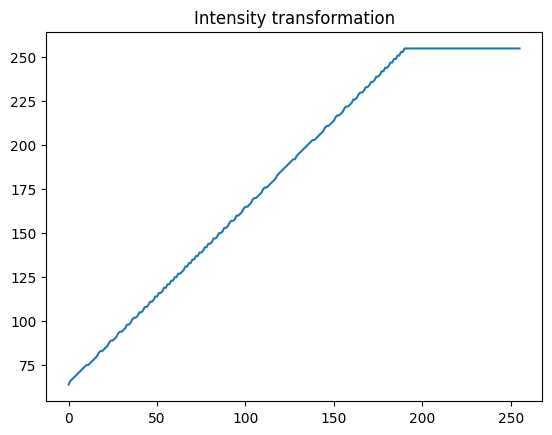

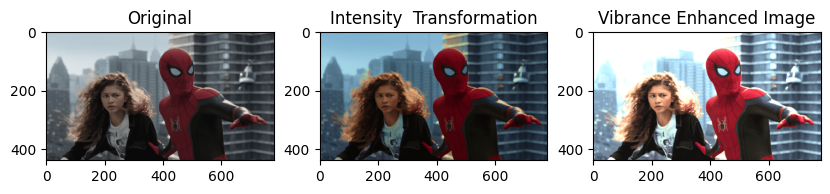

In [17]:
x = np.arange(0,256).astype('uint8')



a = 0.5
sigma = 70

Y = np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))*128), 255).astype('uint8')


image_transform = cv.LUT(s_img,Y)
plt.title('Intensity transformation')
plt.plot(Y)
plt.plot()

newHSV = cv.merge([h_img,image_transform,v_img])
result =  cv.cvtColor(newHSV,  cv.COLOR_HSV2BGR)
newHSV1 = cv.cvtColor(result, cv.COLOR_BGR2RGB)
added_img = cv.add(newHSV1, imc)


fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(imc)
ax[0].set_title('Original')
ax[1].imshow(newHSV1)
ax[1].set_title('Intensity  Transformation')
ax[2].imshow(added_img)
ax[2].set_title('Vibrance Enhanced Image')
plt.show()